In [27]:
#Magical formula & Momentum investment strategy
#Nifty100 stocks pool

import yfinance as yf
import pandas as pd
import numpy as np


In [28]:
# Load CSV file and convert into a DataFrame
file_path = 'stock_data.CSV'
result_df = pd.read_csv(file_path)
result_df = result_df.dropna()

# Display the DataFrame
result_df


,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,pitroski,freeCashFlow5Yrs,roce5Yrs,ebitdYield,earningsYield,fcfYield,liquidity,fcfToDebt,accrualCF,fcf5YrsYield
0,1,ABB.NS,132928.72,1791.47,1671.55,1242.05,1168.40,1351.48,-3352.17,11001.19,...,9,3026.72,18.19,0.013477,0.012575,0.008790,3.579477e-03,23.854635,0.294763,0.022769
1,2,ADANIENSOL.NS,156284.23,6101.13,4534.24,1253.92,-925.22,3776.99,-4698.62,55729.96,...,5,2879.90,10.40,0.039039,0.029013,-0.005920,4.177621e-04,-0.025679,0.039037,0.018427
2,3,ADANIENT.NS,416371.72,10012.78,10423.08,3763.70,2971.66,17626.46,-15458.84,148150.17,...,8,-5401.60,8.08,0.024048,0.025033,0.007137,9.479364e-04,0.052002,0.010773,-0.012973
3,4,ADANIGREEN.NS,353677.09,5870.00,7263.00,1457.00,3927.00,7265.00,-3857.00,71479.00,...,6,-15004.69,7.52,0.016597,0.020536,0.011103,5.288344e-04,0.068441,-0.027295,-0.042425
4,5,ADANIPORTS.NS,339903.31,12488.07,12696.83,7230.19,3012.26,11933.25,-16938.80,114123.08,...,5,21980.62,11.93,0.036740,0.037354,0.008862,1.170047e-03,0.060173,0.107215,0.064667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,UPL.NS,68703.34,10809.00,3118.00,-718.00,5462.00,7751.00,-1354.00,91455.00,...,7,22147.00,12.26,0.157329,0.045384,0.079501,-2.396666e-04,0.156343,-0.077798,0.322357
96,97,VBL.NS,201902.62,3795.75,3114.84,2101.81,-803.14,2390.78,-3287.80,15187.18,...,7,703.86,20.31,0.018800,0.015427,-0.003978,1.002156e-03,-0.147872,0.197458,0.003486
97,98,VEDL.NS,186097.33,37282.00,27814.00,8393.00,19411.00,33065.00,-668.00,193572.00,...,5,87899.00,18.12,0.200336,0.149459,0.104306,7.254256e-04,0.258593,-0.124006,0.472328
98,99,WIPRO.NS,262853.36,19113.60,16087.60,11347.40,11631.30,13060.10,-8169.20,108179.80,...,5,51031.00,19.92,0.072716,0.061204,0.044250,1.710325e-03,0.649159,0.059683,0.194142


In [29]:
# Define whether higher or lower values are better for the ratio
higher_is_better = {
    'roic': True,
}

# Calculate percentiles for the ratio
for ratio, is_higher_better in higher_is_better.items():
    result_df[f'{ratio} Percentile'] = result_df[ratio].rank(pct=True, ascending=is_higher_better) * 100

# Calculate Composite Score of ROIC
percentile_columns = [f'{ratio} Percentile' for ratio in higher_is_better.keys()]
result_df['Composite Score_roic'] = result_df[percentile_columns].mean(axis=1)

# Rank companies based on Composite Score
result_df['Rank_roic'] = result_df['Composite Score_roic'].rank(ascending=False).astype(int)

result_df

,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,ebitdYield,earningsYield,fcfYield,liquidity,fcfToDebt,accrualCF,fcf5YrsYield,roic Percentile,Composite Score_roic,Rank_roic
0,1,ABB.NS,132928.72,1791.47,1671.55,1242.05,1168.40,1351.48,-3352.17,11001.19,...,0.013477,0.012575,0.008790,3.579477e-03,23.854635,0.294763,0.022769,69.0,69.0,32
1,2,ADANIENSOL.NS,156284.23,6101.13,4534.24,1253.92,-925.22,3776.99,-4698.62,55729.96,...,0.039039,0.029013,-0.005920,4.177621e-04,-0.025679,0.039037,0.018427,27.0,27.0,74
2,3,ADANIENT.NS,416371.72,10012.78,10423.08,3763.70,2971.66,17626.46,-15458.84,148150.17,...,0.024048,0.025033,0.007137,9.479364e-04,0.052002,0.010773,-0.012973,24.0,24.0,77
3,4,ADANIGREEN.NS,353677.09,5870.00,7263.00,1457.00,3927.00,7265.00,-3857.00,71479.00,...,0.016597,0.020536,0.011103,5.288344e-04,0.068441,-0.027295,-0.042425,10.0,10.0,91
4,5,ADANIPORTS.NS,339903.31,12488.07,12696.83,7230.19,3012.26,11933.25,-16938.80,114123.08,...,0.036740,0.037354,0.008862,1.170047e-03,0.060173,0.107215,0.064667,37.0,37.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,UPL.NS,68703.34,10809.00,3118.00,-718.00,5462.00,7751.00,-1354.00,91455.00,...,0.157329,0.045384,0.079501,-2.396666e-04,0.156343,-0.077798,0.322357,44.0,44.0,57
96,97,VBL.NS,201902.62,3795.75,3114.84,2101.81,-803.14,2390.78,-3287.80,15187.18,...,0.018800,0.015427,-0.003978,1.002156e-03,-0.147872,0.197458,0.003486,70.0,70.0,31
97,98,VEDL.NS,186097.33,37282.00,27814.00,8393.00,19411.00,33065.00,-668.00,193572.00,...,0.200336,0.149459,0.104306,7.254256e-04,0.258593,-0.124006,0.472328,75.0,75.0,26
98,99,WIPRO.NS,262853.36,19113.60,16087.60,11347.40,11631.30,13060.10,-8169.20,108179.80,...,0.072716,0.061204,0.044250,1.710325e-03,0.649159,0.059683,0.194142,58.0,58.0,43


In [30]:
# Define whether higher or lower values are better for each ratio
higher_is_better = {
    'earningsYield': True,
}

# Calculate percentiles for each ratio
for ratio, is_higher_better in higher_is_better.items():
    result_df[f'{ratio} Percentile'] = result_df[ratio].rank(pct=True, ascending=is_higher_better) * 100

# Calculate Composite Score of earnings yield 
percentile_columns = [f'{ratio} Percentile' for ratio in higher_is_better.keys()]
result_df['Composite Score_eY'] = result_df[percentile_columns].mean(axis=1)

# Rank companies based on Composite Score
result_df['Rank_eY'] = result_df['Composite Score_eY'].rank(ascending=False).astype(int)

result_df


,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,liquidity,fcfToDebt,accrualCF,fcf5YrsYield,roic Percentile,Composite Score_roic,Rank_roic,earningsYield Percentile,Composite Score_eY,Rank_eY
0,1,ABB.NS,132928.72,1791.47,1671.55,1242.05,1168.40,1351.48,-3352.17,11001.19,...,3.579477e-03,23.854635,0.294763,0.022769,69.0,69.0,32,9.0,9.0,92
1,2,ADANIENSOL.NS,156284.23,6101.13,4534.24,1253.92,-925.22,3776.99,-4698.62,55729.96,...,4.177621e-04,-0.025679,0.039037,0.018427,27.0,27.0,74,37.0,37.0,64
2,3,ADANIENT.NS,416371.72,10012.78,10423.08,3763.70,2971.66,17626.46,-15458.84,148150.17,...,9.479364e-04,0.052002,0.010773,-0.012973,24.0,24.0,77,29.0,29.0,72
3,4,ADANIGREEN.NS,353677.09,5870.00,7263.00,1457.00,3927.00,7265.00,-3857.00,71479.00,...,5.288344e-04,0.068441,-0.027295,-0.042425,10.0,10.0,91,23.0,23.0,78
4,5,ADANIPORTS.NS,339903.31,12488.07,12696.83,7230.19,3012.26,11933.25,-16938.80,114123.08,...,1.170047e-03,0.060173,0.107215,0.064667,37.0,37.0,64,47.0,47.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,UPL.NS,68703.34,10809.00,3118.00,-718.00,5462.00,7751.00,-1354.00,91455.00,...,-2.396666e-04,0.156343,-0.077798,0.322357,44.0,44.0,57,53.0,53.0,48
96,97,VBL.NS,201902.62,3795.75,3114.84,2101.81,-803.14,2390.78,-3287.80,15187.18,...,1.002156e-03,-0.147872,0.197458,0.003486,70.0,70.0,31,14.0,14.0,87
97,98,VEDL.NS,186097.33,37282.00,27814.00,8393.00,19411.00,33065.00,-668.00,193572.00,...,7.254256e-04,0.258593,-0.124006,0.472328,75.0,75.0,26,96.0,96.0,5
98,99,WIPRO.NS,262853.36,19113.60,16087.60,11347.40,11631.30,13060.10,-8169.20,108179.80,...,1.710325e-03,0.649159,0.059683,0.194142,58.0,58.0,43,72.0,72.0,29


In [31]:
#Calculate the combined rank and sort the companies based on the combined rank
percentile_columns = result_df['Rank_eY'] + result_df['Rank_roic']
result_df['Composite rank'] = percentile_columns
result_df = result_df.sort_values(by='Composite rank')
result_df.reset_index(drop=True, inplace=True)
result_df

,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,fcfToDebt,accrualCF,fcf5YrsYield,roic Percentile,Composite Score_roic,Rank_roic,earningsYield Percentile,Composite Score_eY,Rank_eY,Composite rank
0,67,ONGC.NS,436303.10,83634.72,83274.12,50386.21,47757.73,84211.33,-72798.97,669081.99,...,0.332815,0.058250,0.395357,83.0,83.0,18,98.0,98.0,3,21
1,17,BAJAJHLDNG.NS,89327.63,5052.31,6135.60,6001.89,1725.76,1727.65,-136.84,61581.37,...,22.113788,0.071630,0.068831,100.0,100.0,1,81.0,81.0,20,21
2,27,COALINDIA.NS,245756.80,43332.26,40361.80,29376.21,20479.44,35686.21,-23422.99,218135.54,...,3.243980,0.078451,0.236306,80.0,80.0,21,97.0,97.0,4,25
3,98,VEDL.NS,186097.33,37282.00,27814.00,8393.00,19411.00,33065.00,-668.00,193572.00,...,0.258593,-0.124006,0.472328,75.0,75.0,26,96.0,96.0,5,31
4,59,LICI.NS,607276.85,42164.56,45234.82,40340.96,59174.47,59718.01,-57899.30,4895434.34,...,59174.470000,0.007869,0.336425,73.0,73.0,28,86.0,86.0,15,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,40,HDFCLIFE.NS,133814.54,1517.25,1052.21,1524.43,6797.26,6883.17,-10071.32,288148.36,...,7.155011,0.016355,0.295203,25.0,25.0,76,4.0,4.0,97,173
96,31,DLF.NS,219850.87,2030.50,2089.65,2373.31,2320.99,2375.26,-460.61,56057.63,...,0.699804,0.008182,0.037416,13.0,13.0,88,6.0,6.0,95,183
97,85,TATAMTRDVR.NS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,3.0,3.0,98,2.0,2.0,99,197
98,52,NAUKRI.NS,72466.49,522.80,332.79,3.39,393.67,520.79,-366.62,24079.20,...,1.435442,-0.006262,0.020664,1.0,1.0,100,3.0,3.0,98,198


In [32]:
#function to fetch the 6m price returns 
def fetch_momentum_6mo(ticker):
    stock = yf.Ticker(ticker)
    momentum6mo = stock.history(period='6mo')['Close'].pct_change().iloc[-1]
    return {
        'momentum6mo': momentum6mo,
    }    
    
# call the function 
momentum_6mo = [fetch_momentum_6mo(ticker) for ticker in result_df['Name']]

# Extract 'momentum6mo' from each dictionary in the financial_ratios list
momentum_6_mo = [momentum_6mo_2['momentum6mo'] for momentum_6mo_2 in momentum_6mo]

# Assign the extracted momentum values to the 'momentum6mo' column in result_df
result_df['momentum6mo'] = momentum_6_mo

result_df

,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,accrualCF,fcf5YrsYield,roic Percentile,Composite Score_roic,Rank_roic,earningsYield Percentile,Composite Score_eY,Rank_eY,Composite rank,momentum6mo
0,67,ONGC.NS,436303.10,83634.72,83274.12,50386.21,47757.73,84211.33,-72798.97,669081.99,...,0.058250,0.395357,83.0,83.0,18,98.0,98.0,3,21,-0.023062
1,17,BAJAJHLDNG.NS,89327.63,5052.31,6135.60,6001.89,1725.76,1727.65,-136.84,61581.37,...,0.071630,0.068831,100.0,100.0,1,81.0,81.0,20,21,-0.027943
2,27,COALINDIA.NS,245756.80,43332.26,40361.80,29376.21,20479.44,35686.21,-23422.99,218135.54,...,0.078451,0.236306,80.0,80.0,21,97.0,97.0,4,25,0.007520
3,98,VEDL.NS,186097.33,37282.00,27814.00,8393.00,19411.00,33065.00,-668.00,193572.00,...,-0.124006,0.472328,75.0,75.0,26,96.0,96.0,5,31,0.037316
4,59,LICI.NS,607276.85,42164.56,45234.82,40340.96,59174.47,59718.01,-57899.30,4895434.34,...,0.007869,0.336425,73.0,73.0,28,86.0,86.0,15,43,0.008820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,40,HDFCLIFE.NS,133814.54,1517.25,1052.21,1524.43,6797.26,6883.17,-10071.32,288148.36,...,0.016355,0.295203,25.0,25.0,76,4.0,4.0,97,173,-0.002724
96,31,DLF.NS,219850.87,2030.50,2089.65,2373.31,2320.99,2375.26,-460.61,56057.63,...,0.008182,0.037416,13.0,13.0,88,6.0,6.0,95,183,-0.018075
97,85,TATAMTRDVR.NS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.000000,3.0,3.0,98,2.0,2.0,99,197,0.004564
98,52,NAUKRI.NS,72466.49,522.80,332.79,3.39,393.67,520.79,-366.62,24079.20,...,-0.006262,0.020664,1.0,1.0,100,3.0,3.0,98,198,0.002529


In [33]:
# Define whether higher or lower values are better for each ratio
higher_is_better = {
    'momentum6mo': True,
}

# Calculate percentiles for each ratio
for ratio, is_higher_better in higher_is_better.items():
    result_df[f'{ratio} Percentile'] = result_df[ratio].rank(pct=True, ascending=is_higher_better) * 100

# Calculate Composite Score of earnings yield 
percentile_columns = [f'{ratio} Percentile' for ratio in higher_is_better.keys()]
result_df['Composite Score_6mo'] = result_df[percentile_columns].mean(axis=1)

# Rank companies based on Composite Score
result_df['Rank_6mo'] = result_df['Composite Score_6mo'].rank(ascending=False).astype(int)

result_df


,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,Composite Score_roic,Rank_roic,earningsYield Percentile,Composite Score_eY,Rank_eY,Composite rank,momentum6mo,momentum6mo Percentile,Composite Score_6mo,Rank_6mo
0,67,ONGC.NS,436303.10,83634.72,83274.12,50386.21,47757.73,84211.33,-72798.97,669081.99,...,83.0,18,98.0,98.0,3,21,-0.023062,7.0,7.0,94
1,17,BAJAJHLDNG.NS,89327.63,5052.31,6135.60,6001.89,1725.76,1727.65,-136.84,61581.37,...,100.0,1,81.0,81.0,20,21,-0.027943,4.0,4.0,97
2,27,COALINDIA.NS,245756.80,43332.26,40361.80,29376.21,20479.44,35686.21,-23422.99,218135.54,...,80.0,21,97.0,97.0,4,25,0.007520,77.0,77.0,24
3,98,VEDL.NS,186097.33,37282.00,27814.00,8393.00,19411.00,33065.00,-668.00,193572.00,...,75.0,26,96.0,96.0,5,31,0.037316,98.0,98.0,3
4,59,LICI.NS,607276.85,42164.56,45234.82,40340.96,59174.47,59718.01,-57899.30,4895434.34,...,73.0,28,86.0,86.0,15,43,0.008820,80.0,80.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,40,HDFCLIFE.NS,133814.54,1517.25,1052.21,1524.43,6797.26,6883.17,-10071.32,288148.36,...,25.0,76,4.0,4.0,97,173,-0.002724,42.0,42.0,59
96,31,DLF.NS,219850.87,2030.50,2089.65,2373.31,2320.99,2375.26,-460.61,56057.63,...,13.0,88,6.0,6.0,95,183,-0.018075,13.0,13.0,88
97,85,TATAMTRDVR.NS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.0,98,2.0,2.0,99,197,0.004564,72.0,72.0,29
98,52,NAUKRI.NS,72466.49,522.80,332.79,3.39,393.67,520.79,-366.62,24079.20,...,1.0,100,3.0,3.0,98,198,0.002529,67.0,67.0,34


In [35]:
#Calculate the combined rank and sort the companies based on the combined rank
percentile_columns = result_df['Composite rank'] + result_df['Rank_6mo']
result_df['Final rank'] = percentile_columns
result_df_sorted = result_df.sort_values(by='Final rank')
result_df_sorted.reset_index(drop=True, inplace=True)
result_df_sorted

,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,Rank_roic,earningsYield Percentile,Composite Score_eY,Rank_eY,Composite rank,momentum6mo,momentum6mo Percentile,Composite Score_6mo,Rank_6mo,Final rank
0,98,VEDL.NS,186097.33,37282.00,27814.00,8393.00,19411.00,33065.00,-668.00,193572.00,...,26,96.0,96.0,5,31,0.037316,98.0,98.0,3,34
1,27,COALINDIA.NS,245756.80,43332.26,40361.80,29376.21,20479.44,35686.21,-23422.99,218135.54,...,21,97.0,97.0,4,25,0.007520,77.0,77.0,24,49
2,33,EICHERMOT.NS,109026.52,4354.17,5017.06,3836.14,2173.75,2847.46,-2421.60,21061.78,...,5,55.0,55.0,46,51,0.020360,92.0,92.0,9,60
3,59,LICI.NS,607276.85,42164.56,45234.82,40340.96,59174.47,59718.01,-57899.30,4895434.34,...,28,86.0,86.0,15,43,0.008820,80.0,80.0,21,64
4,88,TCS.NS,1442729.48,62678.00,62321.00,45033.00,38902.00,41965.00,548.00,154940.00,...,6,52.0,52.0,49,55,0.014187,88.0,88.0,13,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,ADANIENT.NS,416371.72,10012.78,10423.08,3763.70,2971.66,17626.46,-15458.84,148150.17,...,77,29.0,29.0,72,149,-0.007005,33.0,33.0,68,217
96,85,TATAMTRDVR.NS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,98,2.0,2.0,99,197,0.004564,72.0,72.0,29,226
97,40,HDFCLIFE.NS,133814.54,1517.25,1052.21,1524.43,6797.26,6883.17,-10071.32,288148.36,...,76,4.0,4.0,97,173,-0.002724,42.0,42.0,59,232
98,52,NAUKRI.NS,72466.49,522.80,332.79,3.39,393.67,520.79,-366.62,24079.20,...,100,3.0,3.0,98,198,0.002529,67.0,67.0,34,232


In [36]:
# Select top 20% based on rank
top_50_percent = result_df_sorted.head(int(len(result_df_sorted) * 0.2))
top_50 = top_50_percent['Name']
top_50

0           VEDL.NS
1      COALINDIA.NS
2      EICHERMOT.NS
3           LICI.NS
4            TCS.NS
5     MUTHOOTFIN.NS
6        DRREDDY.NS
7           INFY.NS
8         MARUTI.NS
9           LTIM.NS
10    BAJAJ-AUTO.NS
11           M&M.NS
12         WIPRO.NS
13    ASIANPAINT.NS
14    BAJAJFINSV.NS
15         TECHM.NS
16       HCLTECH.NS
17           UPL.NS
18          NTPC.NS
19    HEROMOTOCO.NS
Name: Name, dtype: object

In [38]:
#Backtesting & Optimization

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from datetime import datetime, timedelta

def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

def preprocess_data(data):
    data["Return_6months"] = (data["Adj Close"] / data["Adj Close"].shift(126) - 1) * 100
    data["Return_3months"] = (data["Adj Close"] / data["Adj Close"].shift(63) - 1) * 100
    data["Return_1month"] = (data["Adj Close"] / data["Adj Close"].shift(21) - 1) * 100
    data["Return_1week"] = (data["Adj Close"] / data["Adj Close"].shift(5) - 1) * 100
    data["Return_1day"] = (data["Adj Close"] / data["Adj Close"].shift(1) - 1) * 100

    

    return data

nifty50_data = {}
start_date = "2023-01-01"
end_date = "2024-03-31"

# Fetch Nifty50 data
for symbol in top_50:
    nifty50_data[symbol] = fetch_stock_data(symbol, start_date, end_date)

# trade data storage
trade_data = []

# Iterate over the stocks
for symbol, stock_data in nifty50_data.items():
    processed_data = preprocess_data(stock_data)

    # Check if there are enough data points
    if len(processed_data) < 2:
        print(f"Not enough data for {symbol}. Skipping...")
        continue

    # Buy shares on the start date
    initial_capital = 100000
    shares_bought = int(initial_capital / processed_data["Close"].iloc[0])
    trade_data.append({"Symbol": symbol, "Action": "Buy", "Buy Date": processed_data.index[0], "Price": processed_data["Close"].iloc[0], "Shares": shares_bought, "Capital": initial_capital, "Profit/Loss": 0, "Sell Date": None, "Days in Trade": 0})

    # Sell shares on the end date
    capital = shares_bought * processed_data["Close"].iloc[-1]
    profit_loss = capital - initial_capital
    trade_data[-1]["Sell Date"] = processed_data.index[-1]
    trade_data[-1]["Days in Trade"] = len(pd.bdate_range(trade_data[-1]["Buy Date"], trade_data[-1]["Sell Date"]))
    trade_data.append({"Symbol": symbol, "Action": "Sell", "Buy Date": None, "Sell Date": processed_data.index[-1], "Days in Trade": 0, "Price": processed_data["Close"].iloc[-1], "Shares": shares_bought, "Capital": capital, "Profit/Loss": profit_loss})


trade_df = pd.DataFrame(trade_data)
trade_df.to_csv("QVM_.csv", index=False)

# Calculate total initial capital and total final capital
total_initial_capital = trade_df[trade_df["Action"] == "Buy"]["Capital"].sum()
total_final_capital = total_initial_capital + trade_df[trade_df["Action"] == "Sell"]["Profit/Loss"].sum()

# Display the final capital, percentage return, and in-trade days for each stock
for symbol in nifty50_data.keys():
    final_capital = trade_df[(trade_df["Symbol"] == symbol) & (trade_df["Action"] == "Sell")]["Capital"].iloc[0]
    percentage_return = (final_capital - initial_capital) / initial_capital * 100
    in_trade_days = trade_df[(trade_df["Symbol"] == symbol) & (trade_df["Action"] == "Sell")]["Days in Trade"].iloc[0]
    print(f"Symbol: {symbol}, Final Capital: {final_capital:.2f}, Percentage Return: {percentage_return:.2f}%, In-Trade Days: {in_trade_days}")

# Define the symbol for Nifty50
nifty50_symbol = "^NSEI"

# Download Nifty50 historical data
nifty50_data = yf.download(nifty50_symbol, start=start_date, end=end_date)

# Calculate total return
start_value = nifty50_data["Adj Close"].iloc[0]
end_value = nifty50_data["Adj Close"].iloc[-1]
total_return = ((end_value / start_value) - 1) * 100

# Display the total percentage return across all stocks
total_percentage_return = (total_final_capital - total_initial_capital) / total_initial_capital * 100
print(f"Total Initial Capital: {total_initial_capital:.2f}")
print(f"Total Final Capital Across All Stocks: {total_final_capital:.2f}")
print(f"Total Percentage Return Across All Stocks: {total_percentage_return:.2f}%")
# Display the total return of Nifty50
print(f"Total Return of Nifty50: {total_return:.2f}%")

# trade data storage
y_trade_data = []
nifty_stocks = ["^NSEI"]    
# Iterate over the years
years = range(int(start_date[:4]), int(end_date[:4]))
for year in years:
    # Fetch stock data for each stock
    stock_data_dict = {}
    for symbol in top_50:
        stock_data_dict[symbol] = fetch_stock_data(symbol, f"{year}-01-01", f"{year}-12-31")

    #yearly returns
    yearly_returns = {}

    # Iterate over the stocks
    y_total_portfolio_value = 0
    y_total_initial_capital = 0
    for symbol, stock_data in stock_data_dict.items():
        # Check if there are enough data points
        if len(stock_data) < 2:
            print(f"Not enough data for {symbol} in {year}. Skipping...")
            continue

        # Buy shares on the start date
        y_initial_capital = 100000
        y_shares_bought = int(y_initial_capital / stock_data["Close"].iloc[0])
        y_capital = y_shares_bought * stock_data["Close"].iloc[-1]
        y_total_portfolio_value += y_capital
        y_total_initial_capital += y_initial_capital
   
    # Fetch stock data for each stock
    n_stock_data_dict = {}

    for symbol in nifty_stocks:
        n_stock_data_dict[symbol] = fetch_stock_data(symbol, f"{year}-01-01", f"{year}-12-31")

    # nifty yearly returns
    n_yearly_returns = {}

    # Iterate over the stocks
    n_total_portfolio_value = 0
    n_total_initial_capital = 0
    for symbol, stock_data in n_stock_data_dict.items():
        # Check if there are enough data points
        if len(stock_data) < 2:
            print(f"Not enough data for {symbol} in {year}. Skipping...")
            continue

        # Buy shares on the start date
        n_initial_capital = 100000
        n_shares_bought = int(n_initial_capital / stock_data["Close"].iloc[0])
        n_capital = n_shares_bought * stock_data["Close"].iloc[-1]
        n_total_portfolio_value += n_capital
        n_total_initial_capital += n_initial_capital

    # Append year and yearly return for the portfolio
    yearly_returns["Year"] = year
    yearly_returns["Nifty_50"] = ((n_total_portfolio_value - n_total_initial_capital) / n_total_initial_capital) * 100
    yearly_returns["Portfolio"] = ((y_total_portfolio_value - y_total_initial_capital) / y_total_initial_capital) * 100

    # Append yearly returns to trade data
    y_trade_data.append(yearly_returns)


y_trade_df = pd.DataFrame(y_trade_data)


# Calculate CAGR (Compound Annual Growth Rate)
start_year = int(start_date[:4])
end_year = int(end_date[:4])
years = end_year - start_year

# CAGR formula: ((final value / beginning value) ^ (1 / no of years)) - 1
cagr = ((total_final_capital / total_initial_capital) ** (1 / years)) - 1
print(f"CAGR (Compound Annual Growth Rate of Portfolio): {cagr:.2%}")

# Calculate and print Nifty CAGR
nifty_cagr = ((end_value / start_value) ** (1 / years)) - 1
print(f"CAGR (Compound Annual Growth Rate of Nifty): {nifty_cagr:.2%}")

#Portfolio optimization
#Define the stock tickers and historical data
stock_tickers = top_50
start_year = int(start_date[:4])
end_year = int(end_date[:4])

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

#Function to calculate portfolio returns for a given year
def calculate_portfolio_metrics(weights, year):
    #Fetch historical data for each stock
    stock_data = pd.DataFrame({ticker: fetch_historical_data(ticker, f"{year}-01-01", f"{year+1}-01-01") for ticker in stock_tickers})

    #Calculate portfolio returns
    portfolio_returns = (stock_data.pct_change() * weights).sum(axis=1).dropna()

    #Calculate portfolio cumulative returns
    cumulative_returns = (portfolio_returns + 1).cumprod()

    #Calculate total return for the year
    total_return = cumulative_returns.iloc[-1] - 1

    return total_return, weights  #Return the total return and weights for the year

#Initialize empty dictionary to store annual returns and weights
annual_returns_and_weights = {}

#Loop through each year
for year in range(start_year, end_year):
    #Fetch historical stock data
    stock_data = pd.DataFrame({ticker: fetch_historical_data(ticker, f"{year}-01-01", f"{year+1}-01-01") for ticker in stock_tickers})

    #Calculate expected returns and sample covariance matrix of asset returns
    mu = expected_returns.mean_historical_return(stock_data)
    cov_matrix = risk_models.sample_cov(stock_data)

    #Optimize for maximum Sharpe ratio
    ef = EfficientFrontier(mu, cov_matrix)
    weights = ef.max_sharpe(risk_free_rate= 0.06)  #Assuming a risk-free rate of -3%

    #Calculate portfolio metrics for the year using the optimal weights
    annual_returns_and_weights[year] = calculate_portfolio_metrics(weights, year)

#Print annual returns and weights
for year, (return_value, weights) in annual_returns_and_weights.items():
    print(f"Year: {year}")
    print(f"Return: {return_value:.2%}")
    print("Weights:")
    for ticker, weight in weights.items():
        print(f"{ticker}: {weight:.2%}")
    print()

#Display trade data
print(trade_df)
print(y_trade_df)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [39]:
#Passive portfolio

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
import pandas as pd
import yfinance as yf
import numpy as np

# Define the stock tickers and historical data
stock_tickers = top_50
start_year = int(start_date[:4])
end_year = int(end_date[:4])

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

# Fetch historical stock data for the first year
first_year_stock_data = pd.DataFrame({ticker: fetch_historical_data(ticker, f"{start_year}-01-01", f"{start_year+1}-01-01") for ticker in stock_tickers})

# Calculate expected returns and sample covariance matrix of asset returns for the first year
mu = expected_returns.mean_historical_return(first_year_stock_data)
cov_matrix = risk_models.sample_cov(first_year_stock_data)

# Optimize for maximum Sharpe ratio for the first year
ef = EfficientFrontier(mu, cov_matrix)
weights = ef.max_sharpe(risk_free_rate= 0.06)  # Assuming a risk-free rate of -0.5% for demonstration

# Initialize empty dictionary to store annual returns
annual_returns = {}

# Loop through each year
for year in range(start_year, end_year):
    # Fetch historical stock data for the year
    stock_data = pd.DataFrame({ticker: fetch_historical_data(ticker, f"{year}-01-01", f"{year+1}-01-01") for ticker in stock_tickers})

    # Calculate portfolio returns for the year using the optimized weights
    portfolio_returns = (stock_data.pct_change() * weights).sum(axis=1).dropna()

    # Calculate portfolio cumulative returns
    cumulative_returns = (portfolio_returns + 1).cumprod()

    # Calculate total return for the year
    total_return = cumulative_returns.iloc[-1] - 1

    # Store the total return for the year
    annual_returns[year] = total_return

# Print weights of the stocks
print("Weights of the stocks in the portfolio:")
for ticker, weight in weights.items():
    print(f"{ticker}: {weight:.2%}")

# Print annual returns with the same weights for each year
print("\nAnnual Returns:")
for year, return_value in annual_returns.items():
    print(f"Year: {year}, Return: {return_value:.2%}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [40]:
#Weightage for next year and returns for the year

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import pandas as pd
import yfinance as yf

# Define the stock tickers and historical data range
stock_tickers = top_50
ystart_date = "2020-01-01"
yend_date = "2022-12-31"

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, ystart_date, yend_date):
    return yf.download(stock_ticker, start=ystart_date, end=yend_date)['Adj Close']

# Initialize empty dictionary to store historical stock data
stock_data = {}

# Fetch historical stock data for each stock
for ticker in stock_tickers:
    stock_data[ticker] = fetch_historical_data(ticker, ystart_date, yend_date)

# Combine stock data into a single DataFrame
all_stock_data = pd.DataFrame(stock_data)

# Calculate expected returns and sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(all_stock_data)
cov_matrix = risk_models.sample_cov(all_stock_data)

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, cov_matrix)
weights = ef.max_sharpe()

# Print optimal weights for next year 
print("Optimal Weights for next year:")
for ticker, weight in weights.items():
    print(f"{ticker}: {weight:.2%}")

# Determine start date and end date for next year
next_year_start_date = pd.Timestamp(yend_date) + pd.DateOffset(days=1)
next_year_end_date = pd.Timestamp(yend_date) + pd.DateOffset(years=1)

# Fetch historical stock data for next year if available
next_year_stock_data = {}
for ticker in stock_tickers:
    next_year_stock_data[ticker] = fetch_historical_data(ticker, next_year_start_date, next_year_end_date)

# Check if data for next year exists
if all(data.empty for data in next_year_stock_data.values()):
    print("No historical data available for next year.")
else:
    # Combine next year stock data into a single DataFrame
    all_next_year_stock_data = pd.DataFrame(next_year_stock_data)
    
    # Calculate portfolio returns for next year using optimal weights
    portfolio_returns = (all_next_year_stock_data.pct_change() * weights).sum(axis=1).dropna()
    # Calculate total portfolio returns for next year
    total_portfolio_return_next_year = portfolio_returns.sum()

    # Print total portfolio returns for next year
    print("Total Portfolio Returns of the next year so far:", total_portfolio_return_next_year)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [41]:
#weightage of stocks for next month and returns for the month

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import pandas as pd
import yfinance as yf

# Define the stock tickers and historical data
stock_tickers = top_50
mstart_date = "2023-04-01"
mend_date = "2024-03-31" 

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, mstart_date, mend_date):
    return yf.download(stock_ticker, start=mstart_date, end=mend_date)['Adj Close']

# Fetch historical stock data up to the end month
stock_data = pd.DataFrame({ticker: fetch_historical_data(ticker, mstart_date, mend_date) for ticker in stock_tickers})

# Calculate expected returns and sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(stock_data)
cov_matrix = risk_models.sample_cov(stock_data)

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, cov_matrix)
weights = ef.max_sharpe(risk_free_rate= 0.06)

# Print the optimal weights for the following month after the end date
print("Optimal Weights for the Following Month after the End Date:", pd.Timestamp(end_date).to_period('M').asfreq('M').to_timestamp().strftime("%Y-%m"))
print("Weights:")
for ticker, weight in weights.items():
    print(f"{ticker}: {weight:.2%}")


# Determine the start and end dates for the next month
next_month_start_date = pd.Timestamp(end_date) + pd.offsets.MonthBegin(1)
next_month_end_date = pd.Timestamp(next_month_start_date) + pd.offsets.MonthEnd(0)

# Fetch historical stock data for the next month if available
try:
    next_month_stock_data = pd.DataFrame({ticker: fetch_historical_data(ticker, next_month_start_date, next_month_end_date) for ticker in stock_tickers})

    # Calculate portfolio returns for the next month using optimal weights
    portfolio_returns_next_month = (next_month_stock_data.pct_change() * weights).sum(axis=1).dropna()

    # Calculate total portfolio returns for the next month
    total_portfolio_return_next_month = portfolio_returns_next_month.sum()

    # Print total portfolio returns for the next month
    print("Total Portfolio Returns for the Next Month:", total_portfolio_return_next_month)

except Exception as e:
    # Display optimal weights if stock data is not available for the next month
    print("Stock data for the next month is not available. Displaying optimal weights instead:")
    print("Optimal Weights for the Following Month after the End Date:", pd.Timestamp(end_date).to_period('M').asfreq('M').to_timestamp().strftime("%Y-%m"))
    print("Weights:")
    for ticker, weight in weights.items():
        print(f"{ticker}: {weight:.2%}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

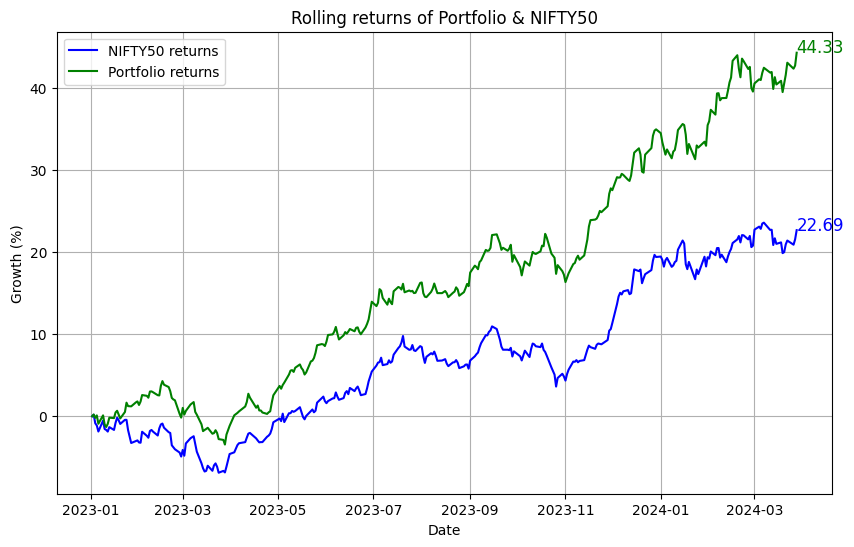

In [42]:
#Visualization
#Benchmarking the portfolio rolling returns with NIFTY50 Index
import matplotlib.pyplot as plt

# Fetch stock data for Nifty50
nifty_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

# Fetch historical stock data
portfolio_data = pd.DataFrame({ticker: fetch_historical_data(ticker, start_date, end_date) for ticker in stock_tickers})

# Calculate cumulative growth for Nifty50
nifty_growth = (nifty_data / nifty_data.iloc[0] - 1) * 100

# Calculate cumulative growth for the portfolio (equal-weighted)
portfolio_growth = (portfolio_data.mean(axis=1) / portfolio_data.mean(axis=1).iloc[0] - 1) * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(nifty_growth, label='NIFTY50 returns', color='blue')
plt.plot(portfolio_growth, label='Portfolio returns', color='green')
plt.title('Rolling returns of Portfolio & NIFTY50')
plt.xlabel('Date')
plt.ylabel('Growth (%)')
plt.legend()
plt.grid(True)
# Annotate the final value of each line
plt.text(nifty_growth.index[-1], nifty_growth.iloc[-1], f'{nifty_growth.iloc[-1]:.2f}', color='blue', fontsize=12, ha='left')
plt.text(portfolio_growth.index[-1], portfolio_growth.iloc[-1], f'{portfolio_growth.iloc[-1]:.2f}', color='green', fontsize=12, ha='left')

plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

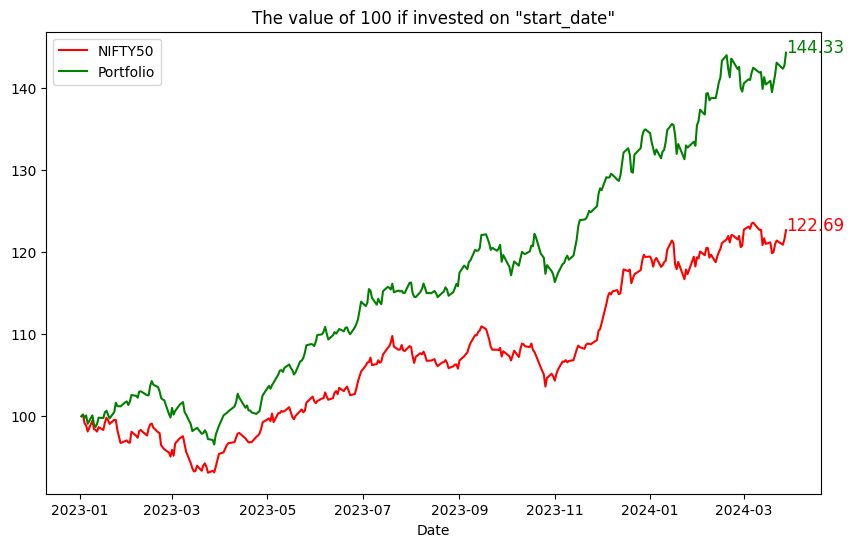

In [43]:
#Visualizing the value of 100 if invested on the start the date
#Fetch stock data for Nifty50
nifty_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

# Fetch historical stock data
portfolio_data = pd.DataFrame({ticker: fetch_historical_data(ticker, start_date, end_date) for ticker in stock_tickers})

# Calculate cumulative growth for NIFTY
nifty_growth = (nifty_data / nifty_data.iloc[0]) * 100

# Calculate cumulative growth for the portfolio (equal-weighted)
portfolio_growth = (portfolio_data.mean(axis=1) / portfolio_data.mean(axis=1).iloc[0]) * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(nifty_growth, label='NIFTY50', color='red')
plt.plot(portfolio_growth, label='Portfolio', color='green')
plt.title('The value of 100 if invested on "start_date"')
plt.xlabel('Date')
plt.legend()
plt.grid(False)


# Annotate the final value of each line
plt.text(nifty_growth.index[-1], nifty_growth.iloc[-1], f'{nifty_growth.iloc[-1]:.2f}', color='red', fontsize=12, ha='left')
plt.text(portfolio_growth.index[-1], portfolio_growth.iloc[-1], f'{portfolio_growth.iloc[-1]:.2f}', color='green', fontsize=12, ha='left')

plt.show()


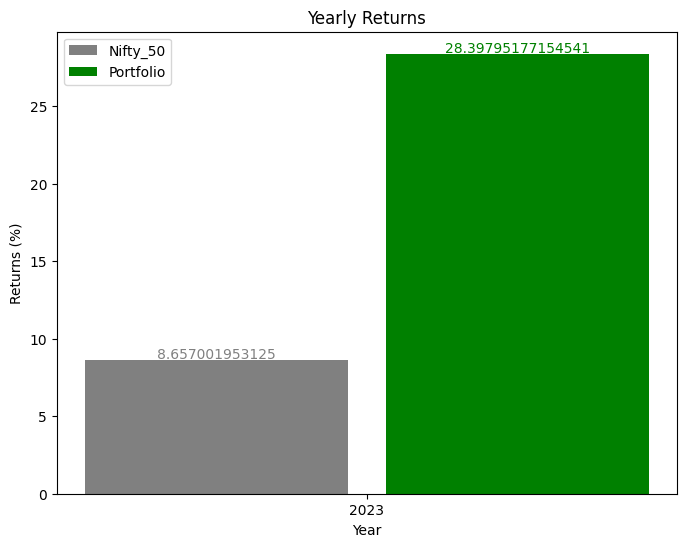

In [44]:
#Visual comparision of yearly returns between portfolio & NIFTY50
# Plotting
plt.figure(figsize=(8, 6))

# Plot Nifty_50 returns
plt.bar(y_trade_df['Year'] - 0.2, y_trade_df['Nifty_50'], width=0.35, label='Nifty_50', color='grey')

# Plot Portfolio returns
plt.bar(y_trade_df['Year'] + 0.2, y_trade_df['Portfolio'], width=0.35, label='Portfolio', color='green')

plt.title('Yearly Returns')
plt.xlabel('Year')
plt.ylabel('Returns (%)')
plt.xticks(y_trade_df['Year'])
plt.legend()
#plt.grid(axis='y')

# Annotate each bar with its corresponding value
for index, row in y_trade_df.iterrows():
    plt.text(row['Year'] - 0.2, row['Nifty_50'] + 0.1, str(row['Nifty_50']), color='grey', ha='center')
    plt.text(row['Year'] + 0.2, row['Portfolio'] + 0.1, str(row['Portfolio']), color='green', ha='center')

plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

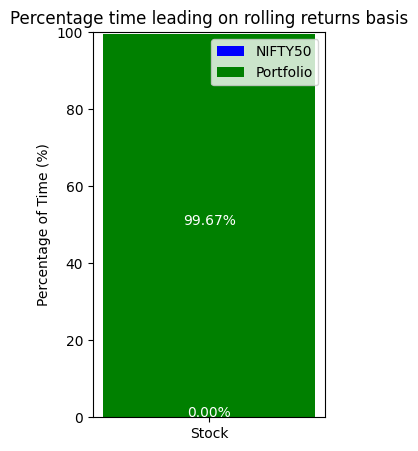

In [45]:
#Visual representation of Percentage Time Leading on 1-year Rolling Basis
#Fetch stock data for Nifty50
nifty_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

# Fetch historical stock data 
portfolio_data = pd.DataFrame({ticker: fetch_historical_data(ticker, start_date, end_date) for ticker in stock_tickers})

# Calculate daily returns for NIFTY50
nifty_daily_returns = nifty_data.pct_change()

# Calculate daily returns for the portfolio (equal-weighted)
portfolio_daily_returns = portfolio_data.mean(axis=1).pct_change()

# Calculate cumulative returns
nifty_cumulative_returns = (1 + nifty_daily_returns).cumprod() - 1
portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod() - 1

# Compare cumulative returns and count occurrences
nifty_outperforms = (nifty_cumulative_returns > portfolio_cumulative_returns).sum()
portfolio_outperforms = (nifty_cumulative_returns < portfolio_cumulative_returns).sum()
total_days = len(nifty_cumulative_returns)

# Calculate the percentage of time each outperforms the other
nifty_outperforms_percentage = nifty_outperforms / total_days * 100
portfolio_outperforms_percentage = portfolio_outperforms / total_days * 100

# Plotting
plt.figure(figsize=(3, 5))

# Plot a single stacked bar chart with reduced width
plt.bar(['Stock'], nifty_outperforms_percentage, width=0.2, color='blue', label='NIFTY50')
plt.bar(['Stock'], portfolio_outperforms_percentage, bottom=nifty_outperforms_percentage, width=0.2, color='green', label='Portfolio')

plt.title('Percentage time leading on rolling returns basis')
#plt.xlabel('Comparison')
plt.ylabel('Percentage of Time (%)')
plt.legend()

plt.text('Stock', nifty_outperforms_percentage / 2, f'{nifty_outperforms_percentage:.2f}%', color='white', ha='center')
plt.text('Stock', nifty_outperforms_percentage + portfolio_outperforms_percentage / 2, f'{portfolio_outperforms_percentage:.2f}%', color='white', ha='center')

plt.ylim(0, 100)

plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

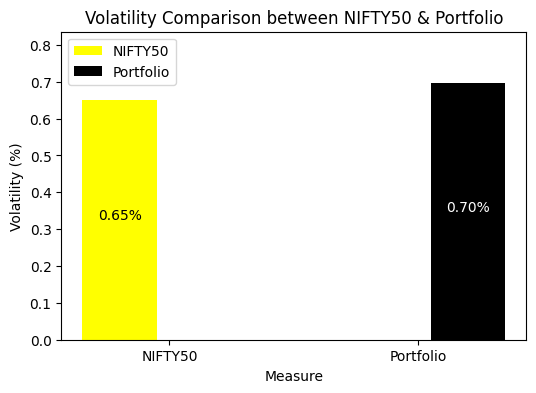

In [46]:
#Visual representation of volatility comparision between portfolio & NIFTY50
# Fetch stock data for Nifty50
nifty_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

# Fetch historical stock data
portfolio_data = pd.DataFrame({ticker: fetch_historical_data(ticker, start_date, end_date) for ticker in stock_tickers})

# Calculate daily returns for NIFTY50
nifty_daily_returns = nifty_data.pct_change()

# Calculate daily returns for the portfolio (equal-weighted)
portfolio_daily_returns = portfolio_data.mean(axis=1).pct_change()

# Calculate volatility (standard deviation) for NIFTY50
nifty_volatility = nifty_daily_returns.std() * 100  # Converting to percentage

# Calculate portfolio volatility (standard deviation)
portfolio_volatility = portfolio_daily_returns.std() * 100  # Converting to percentage

# Plotting
plt.figure(figsize=(6, 4))

# Define the x-axis positions for the bars
x = np.arange(1.5)

# Plot the volatilities in a bar graph with reduced width
plt.bar(x - 0.2, [nifty_volatility, 0], width=0.3, color='yellow', label='NIFTY50')
plt.bar(x + 0.2, [0, portfolio_volatility], width=0.3, color='black', label='Portfolio')

plt.title('Volatility Comparison between NIFTY50 & Portfolio')
plt.xlabel('Measure')
plt.ylabel('Volatility (%)')
plt.xticks(x, ['NIFTY50', 'Portfolio'])
plt.legend()

# Annotate the bars with the volatility values
plt.text(x[0] - 0.2, nifty_volatility / 2, f'{nifty_volatility:.2f}%', color='black', ha='center')
plt.text(x[1] + 0.2, portfolio_volatility / 2, f'{portfolio_volatility:.2f}%', color='white', ha='center')

plt.ylim(0, max(nifty_volatility, portfolio_volatility) * 1.2)  # Set y-axis limit to accommodate the bars

plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

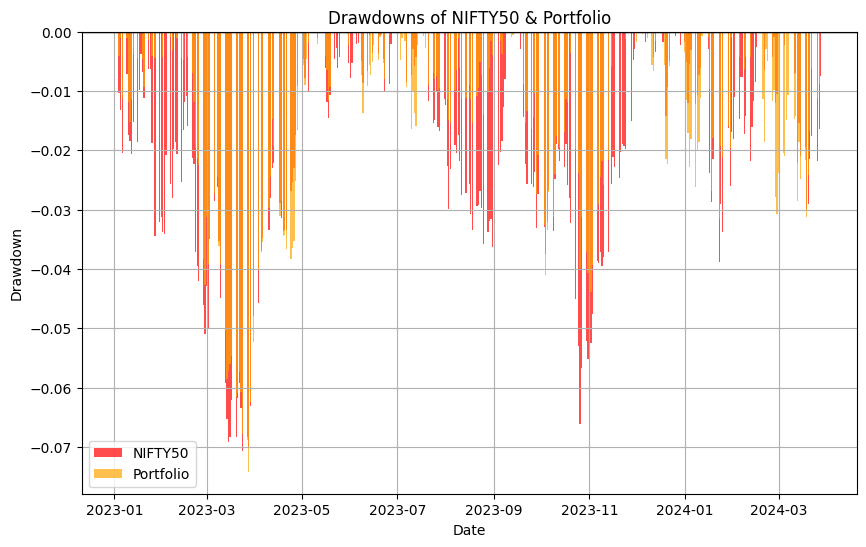

In [47]:
#Drawdown and maximum drawdown of NIFTY50 & Portfolio
# Fetch stock data for Nifty50
nifty_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

# Fetch historical stock data
portfolio_data = pd.DataFrame({ticker: fetch_historical_data(ticker, start_date, end_date) for ticker in stock_tickers})

# Calculate daily returns for NIFTY50
nifty_daily_returns = nifty_data.pct_change()

# Calculate the daily returns for the portfolio (equal-weighted)
portfolio_daily_returns = portfolio_data.mean(axis=1).pct_change()

# Calculate the cumulative product of the NIFTY50 returns
nifty_cumulative_returns = (1 + nifty_daily_returns).cumprod()

# Calculate the cumulative product of the portfolio returns
portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod()

# Calculate the cumulative maximum of the NIFTY50 returns
nifty_cumulative_max = nifty_cumulative_returns.cummax()

# Calculate the cumulative maximum of the portfolio returns
portfolio_cumulative_max = portfolio_cumulative_returns.cummax()

# Calculate the drawdown as the ratio of the returns to the cumulative maximum
nifty_drawdown = (nifty_cumulative_returns - nifty_cumulative_max) / nifty_cumulative_max
portfolio_drawdown = (portfolio_cumulative_returns - portfolio_cumulative_max) / portfolio_cumulative_max

# Print maximum drawdown values
print("Maximum Drawdown:")
print(f"NIFTY50: {nifty_drawdown.min() * 100:.2f}%")
print(f"Portfolio: {portfolio_drawdown.min() * 100:.2f}%")

# Plotting
plt.figure(figsize=(10, 6))

# Plot the drawdown for NIFTY50
plt.bar(nifty_drawdown.index, nifty_drawdown, color='red', alpha=0.7, label='NIFTY50')

# Plot the drawdown for the portfolio
plt.bar(portfolio_drawdown.index, portfolio_drawdown, color='orange', alpha=0.7, label='Portfolio')

plt.title('Drawdowns of NIFTY50 & Portfolio')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.axhline(0, color='black', linewidth=1)  # Add a horizontal line at y=0
plt.legend()
plt.grid(True)

plt.show()


In [49]:

# Define the stock tickers
stock_tickers = top_50

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

# Initialize empty dictionary to store historical stock data
stock_data = {}

# Fetch historical stock data for each stock
for ticker in stock_tickers:
    stock_data[ticker] = fetch_historical_data(ticker, start_date, end_date)

# Combine stock data into a single DataFrame
all_stock_data = pd.DataFrame(stock_data)

# Calculate portfolio returns
portfolio_returns = all_stock_data.pct_change().dropna()

# Equal weights for each stock in the portfolio
num_stocks = len(stock_tickers)
equal_weight = 1 / num_stocks

# Calculate average annual returns for each stock
average_annual_returns = portfolio_returns.mean() * 252  # 252 trading days in a year

# Calculate portfolio returns by multiplying the stock weightage to the average stock returns and summing them up
portfolio_annual_return = (average_annual_returns * equal_weight).sum()

# Risk-free rate (assuming 7%)
risk_free_rate = 0.07

# Calculate covariance matrix
covariance_matrix = portfolio_returns.cov() * 252

# Ensure covariance matrix is positive semi-definite
cholesky_factor = np.linalg.cholesky(covariance_matrix + 1e-10 * np.eye(len(covariance_matrix)))

# Calculate portfolio standard deviation
portfolio_std_dev = np.sqrt(np.dot(equal_weight, np.dot(cholesky_factor, cholesky_factor.T).diagonal()))

# Calculate market returns (assuming S&P 500 index as market)
market_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']
market_returns = market_data.pct_change().dropna()

# Align market returns with portfolio returns
market_returns = market_returns[:len(portfolio_returns)]

# Calculate beta of the portfolio
portfolio_beta = np.cov(portfolio_returns.T, market_returns)[0, 1] / np.var(market_returns)

# Calculate Treynor Measure for the portfolio
treynor_measure = (portfolio_annual_return - risk_free_rate) / portfolio_beta

# Calculate Jensen's Alpha for the portfolio
portfolio_alpha = portfolio_annual_return - (risk_free_rate + portfolio_beta * (np.mean(market_returns) * 252 - risk_free_rate))

print ("Portfolio Beta:", portfolio_beta) 
print("Treynor Measure:", treynor_measure)
print("Jensen's Alpha:", portfolio_alpha)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [50]:
#Sharpe ratio
tickers = top_50
# Function to fetch historical stock data
def fetch_historical_data(stock, start, end):
    return yf.download(stock, start=start, end=end)['Adj Close']

# Function to calculate portfolio returns and Sharpe Ratio
def compute_sharpe_ratio(data, weights, risk_free_rate=0.07):
    # Combine stock data into a single DataFrame
    all_stock_data = pd.DataFrame(data)
    
    # Calculate portfolio returns
    stock_returns = all_stock_data.pct_change().dropna()
    
    # Calculate portfolio returns by multiplying the stock weightage to the average stock returns and summing them up
    portfolio_annual_return = (stock_returns.mean() * 252 @ weights)
    
    # Calculate portfolio standard deviation
    portfolio_volatility = np.sqrt(weights.T @ (stock_returns.cov() * 252) @ weights)
    
    # Calculate Sharpe Ratio for the portfolio
    sharpe_ratio = (portfolio_annual_return - risk_free_rate) / portfolio_volatility
    
    return sharpe_ratio[0]  # Return the single Sharpe Ratio value

# Fetch historical stock data for each stock
stock_prices = {}
for ticker in tickers:
    stock_prices[ticker] = fetch_historical_data(ticker, start_date, end_date)

# Equal weights for each stock in the portfolio
num_stocks = len(tickers)
weights_portfolio = np.ones((num_stocks, 1)) / num_stocks

# Calculate Sharpe Ratio of the portfolio with equal weights
sharpe_ratio_portfolio = compute_sharpe_ratio(stock_prices, weights_portfolio)

print("Sharpe Ratio:", sharpe_ratio_portfolio)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [51]:
#Tracking error & Information ratio

# Function to fetch historical stock data
def fetch_historical_data(stock, start_date, end_date):
    return yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Function to calculate annualized returns
def calculate_annualized_returns(data):
    # Calculate daily returns
    daily_returns = data.pct_change().dropna()
    
    # Calculate cumulative returns
    cumulative_returns = (1 + daily_returns).prod() - 1
    
    # Annualize returns
    annualized_returns = (1 + cumulative_returns) ** (252 / len(data)) - 1  # Assuming 252 trading days in a year
    
    return annualized_returns

# Function to calculate tracking error
def calculate_tracking_error(portfolio_data, benchmark_data):
    # Ensure the lengths of portfolio and benchmark returns match
    if len(portfolio_data) != len(benchmark_data):
        raise ValueError("Portfolio data and benchmark data must have the same length")
    
    # Calculate portfolio returns and benchmark returns
    portfolio_returns = calculate_annualized_returns(portfolio_data)
    benchmark_returns = calculate_annualized_returns(benchmark_data)
    
    # Calculate the difference between portfolio returns and benchmark returns
    tracking_error = portfolio_returns - benchmark_returns
    
    # Calculate the squared tracking error
    squared_tracking_error = tracking_error ** 2
    
    # Calculate the sum of squared tracking errors
    sum_squared_tracking_error = np.sum(squared_tracking_error)
    
    # Calculate the mean squared tracking error
    mean_squared_tracking_error = sum_squared_tracking_error / (len(portfolio_returns) - 1)
    
    # Calculate the tracking error (standard deviation of the difference in returns)
    tracking_error = np.sqrt(mean_squared_tracking_error)
    
    return tracking_error

# Define the portfolio tickers and benchmark ticker
portfolio_tickers = top_50
benchmark_ticker = '^NSEI'  

# Fetch historical stock data for portfolio and benchmark
portfolio_data = pd.DataFrame({ticker: fetch_historical_data(ticker, start_date, end_date) for ticker in portfolio_tickers})
benchmark_data = fetch_historical_data(benchmark_ticker, start_date, end_date)

# Calculate tracking error
tracking_error = calculate_tracking_error(portfolio_data, benchmark_data)


# Function to calculate information ratio for the entire portfolio
def calculate_portfolio_information_ratio(portfolio_data, benchmark_data, tracking_error):
    # Calculate annualized returns for portfolio and benchmark
    portfolio_returns = calculate_annualized_returns(portfolio_data)
    benchmark_returns = calculate_annualized_returns(benchmark_data)
    
    # Calculate weighted average portfolio return
    portfolio_weighted_return = (portfolio_returns.values * equal_weight).sum()
    
    # Calculate information ratio for the entire portfolio
    information_ratio = (portfolio_weighted_return - benchmark_returns) / tracking_error
    
    return information_ratio

# Calculate information ratio for the entire portfolio
portfolio_information_ratio = calculate_portfolio_information_ratio(portfolio_data, benchmark_data, tracking_error)

print("Information Ratio:", portfolio_information_ratio)
print("Tracking error:", tracking_error)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
from tqdm import tqdm

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

# Define the stock tickers and historical data
e_stock_tickers = top_50
e_start_date = "2023-04-01"
e_end_date = "2024-03-31" 

# Function to fetch historical stock data
def e_fetch_historical_data(e_stock_ticker, e_start_date, e_end_date):
    return yf.download(e_stock_ticker, start= e_start_date, end= e_end_date)['Adj Close']

# Fetch historical stock data up to the end date
e_stock_data = pd.DataFrame({ticker: e_fetch_historical_data(ticker, e_start_date, e_end_date) for ticker in e_stock_tickers})

# Calculate daily returns
e_daily_returns = e_stock_data.pct_change().dropna()
print(e_daily_returns.head())


In [ ]:
#-- Get annualised mean returns
mus = (1+e_daily_returns.mean())**252 - 1

#-- Get covariances
#- Multiply by 252 to annualise it (square root time for volatility but no square root for variance)
#- Note: 252 trading days in a year
#- https://quant.stackexchange.com/questions/4753/annualized-covariance
cov = e_daily_returns.cov()*252

#- How many assests to include in each portfolio
n_assets = 4
#-- How many portfolios to generate
n_portfolios = 10000

#-- Initialize empty list to store mean-variance pairs for plotting
mean_variance_pairs = []

np.random.seed(75)
#-- Loop through and generate lots of random portfolios
for i in range(n_portfolios):
    #- Choose assets randomly without replacement
    assets = np.random.choice(list(e_daily_returns.columns), n_assets, replace=False)
    #- Choose weights randomly
    weights = np.random.rand(n_assets)
    #- Ensure weights sum to 1
    weights = weights/sum(weights)

    #-- Loop over asset pairs and compute portfolio return and variance
    #- https://quant.stackexchange.com/questions/43442/portfolio-variance-explanation-for-equation-investments-by-zvi-bodie
    portfolio_E_Variance = 0
    portfolio_E_Return = 0
    for i in range(len(assets)):
        portfolio_E_Return += weights[i] * mus.loc[assets[i]]
        for j in range(len(assets)):
            #-- Add variance/covariance for each asset pair
            #- Note that when i==j this adds the variance
            portfolio_E_Variance += weights[i] * weights[j] * cov.loc[assets[i], assets[j]]
            
    #-- Add the mean/variance pairs to a list for plotting
    mean_variance_pairs.append([portfolio_E_Return, portfolio_E_Variance])

#-- Plot the risk vs. return of randomly generated portfolios
#-- Convert the list from before into an array for easy plotting
mean_variance_pairs = np.array(mean_variance_pairs)

risk_free_rate=0.07 #-- Include risk free rate here

fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairs[:,1]**0.5, y=mean_variance_pairs[:,0], 
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers'))
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Annualised Risk (Volatility)'),
                  yaxis=dict(title='Annualised Return'),
                  title='Sample of Random Portfolios',
                  width=850,
                  height=500)
fig.update_xaxes(range=[0.18, 0.32])
fig.update_yaxes(range=[0.02,0.27])
fig.update_layout(coloraxis_colorbar=dict(title="Sharpe Ratio"))

In [ ]:
#-- Create random portfolio weights and indexes
#- How many assests in the portfolio
n_assets = 4

mean_variance_pairs = []
weights_list=[]
tickers_list=[]

for i in tqdm(range(10000)):
    next_i = False
    while True:
        #- Choose assets randomly without replacement
        assets = np.random.choice(list(e_daily_returns.columns), n_assets, replace=False)
        #- Choose weights randomly ensuring they sum to one
        weights = np.random.rand(n_assets)
        weights = weights/sum(weights)

        #-- Loop over asset pairs and compute portfolio return and variance
        portfolio_E_Variance = 0
        portfolio_E_Return = 0
        for i in range(len(assets)):
            portfolio_E_Return += weights[i] * mus.loc[assets[i]]
            for j in range(len(assets)):
                portfolio_E_Variance += weights[i] * weights[j] * cov.loc[assets[i], assets[j]]

        #-- Skip over dominated portfolios
        for R,V in mean_variance_pairs:
            if (R > portfolio_E_Return) & (V < portfolio_E_Variance):
                next_i = True
                break
        if next_i:
            break

        #-- Add the mean/variance pairs to a list for plotting
        mean_variance_pairs.append([portfolio_E_Return, portfolio_E_Variance])
        weights_list.append(weights)
        tickers_list.append(assets)
        break

print (len(mean_variance_pairs))

import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Convert the list from before into an array for easy plotting
mean_variance_pairs = np.array(mean_variance_pairs)

risk_free_rate = 0.07

# Create lists to store portfolio information
stocks_in_portfolios = []
weights_in_portfolios = []
portfolio_names = []  # List to store portfolio names

# Iterate through each portfolio
for i in range(len(tickers_list)):
    # Extract stocks and their weightage for the portfolio
    assets = tickers_list[i]
    weights = weights_list[i]
    
    # Append to the lists
    stocks_in_portfolios.append(", ".join([asset.split(":")[0] for asset in assets]))  # Extracting only the stock names
    weights_in_portfolios.append(", ".join([f"{weight:.2f}" for weight in weights]))  # Extracting only the weights
    portfolio_names.append(f'Portfolio {i+1}')  # Assigning portfolio names

# Create DataFrame from the collected portfolio data
portfolio_df = pd.DataFrame({'Portfolio Name': portfolio_names,
                             'Stocks': stocks_in_portfolios,
                             'Weights': weights_in_portfolios})

# Print portfolio information
print(portfolio_df)

# Create the figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairs[:,1]**0.5, y=mean_variance_pairs[:,0], 
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers',
                      text=[f"{portfolio_names[i]}<br>{str(np.array(tickers_list[i]))}<br>{str(np.array(weights_list[i]).round(2))}" for i in range(len(tickers_list))]))  # Add portfolio names to text
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Annualised Risk (Volatility)'),
                  yaxis=dict(title='Annualised Return'),
                  title='Efficient Frontier Portfolios',
                  width=850,
                  height=500)
fig.update_xaxes(range=[0.18, 0.35])
fig.update_yaxes(range=[0.05,0.29])
fig.update_layout(coloraxis_colorbar=dict(title="Sharpe Ratio"))

# Show the figure
fig.show()


In [ ]:
import pandas as pd
import yfinance as yf

# Define start and end dates for future returns calculation
start_date = "2024-04-01"
end_date = "2024-04-30"

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

# Function to calculate portfolio return
def calculate_portfolio_return(row):
    # Extract stocks and their weights
    assets = row['Stocks'].split(", ")
    weights = [float(w) for w in row['Weights'].split(", ")]
    
    # Fetch historical stock data for the specified time period
    historical_stock_data = pd.DataFrame({ticker: fetch_historical_data(ticker, start_date, end_date) for ticker in assets})
    
    # Calculate daily returns for each stock
    daily_returns = historical_stock_data.pct_change().dropna()
    
    # Initialize an array to store portfolio returns
    portfolio_returns = []
    
    # Calculate portfolio return for each day
    for i in range(len(daily_returns)):
        # Calculate weighted daily returns for each stock
        weighted_daily_returns = daily_returns.iloc[i] * weights
        
        # Calculate portfolio daily return by summing up weighted returns
        portfolio_daily_return = weighted_daily_returns.sum()
        
        # Append portfolio return to the array
        portfolio_returns.append(portfolio_daily_return)
    
    # Convert the list of portfolio returns to a pandas Series
    portfolio_returns_series = pd.Series(portfolio_returns)
    
    # Calculate cumulative return for the period
    cumulative_return = (1 + portfolio_returns_series).prod() - 1
    
    return cumulative_return

# Apply the function to each row in the DataFrame and store the results in a new column
portfolio_df['Portfolio Return'] = portfolio_df.apply(calculate_portfolio_return, axis=1)

# Print portfolio returns
print(portfolio_df[['Stocks', 'Weights', 'Portfolio Return']])

# Define the file path for saving the CSV file
output_file_path = "Mf&M_portfolio_returns.csv"

# Save the DataFrame to a CSV file
portfolio_df.to_csv(output_file_path, index=False)

print("Portfolio returns saved to:", output_file_path)


In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Define start and end dates
start_date = "2024-04-01"
end_date = "2024-05-08"

# Fetch stock data for Nifty50
nifty_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

# Function to plot portfolio growth
def plot_portfolio_growth(portfolio_name):
    # Fetch historical stock data for portfolio stocks
    portfolio_row = portfolio_df[portfolio_df['Portfolio Name'].str.lower() == portfolio_name.lower()]
    if portfolio_row.empty:
        print(f"No portfolio named '{portfolio_name}' found.")
        return
    
    weights = [float(w) for w in portfolio_row['Weights'].iloc[0].split(", ")]
    assets = portfolio_row['Stocks'].iloc[0].split(", ")
    
    # Fetch historical data for each stock in the portfolio
    stock_data = {}
    for asset in assets:
        stock_data[asset] = fetch_historical_data(asset, start_date, end_date)
    
    # Combine historical data for all stocks in the portfolio
    portfolio_data = pd.DataFrame(stock_data)
    
    # Calculate portfolio growth
    portfolio_growth = (portfolio_data.mul(weights, axis=1).sum(axis=1) / portfolio_data.mul(weights, axis=1).sum(axis=1).iloc[0] - 1) * 100
    
    # Calculate cumulative growth for Nifty50
    nifty_growth = (nifty_data / nifty_data.iloc[0] - 1) * 100

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(nifty_growth, label='NIFTY50 returns', color='black')
    plt.plot(portfolio_growth, label=f'Portfolio {portfolio_name}', color='blue')

    # Annotate the final value of each line
    final_nifty_return = nifty_growth.iloc[-1]
    final_portfolio_return = portfolio_growth.iloc[-1]
    plt.text(nifty_growth.index[-1], final_nifty_return, f'{final_nifty_return:.2f}', color='black', fontsize=12, ha='left')
    plt.text(portfolio_growth.index[-1], final_portfolio_return, f'{final_portfolio_return:.2f}', color='blue', fontsize=12, ha='left')

    plt.title(f'Portfolio {portfolio_name} Growth vs. NIFTY50')
    plt.xlabel('Date')
    plt.ylabel('Growth (%)')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Example usage:
plot_portfolio_growth('Portfolio 73')


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Define start and end dates
start_date = "2024-01-01"
end_date = "2024-04-25"

# Function to fetch historical stock data
def fetch_historical_data(stock_tickers, start_date, end_date):
    return pd.DataFrame({ticker: yf.download(ticker, start=start_date, end=end_date)['Adj Close'] for ticker in stock_tickers})

# Function to calculate cumulative returns
def calculate_cumulative_returns(data, weights):
    cumulative_returns = (data.mul(weights, axis=1).sum(axis=1) / data.mul(weights, axis=1).sum(axis=1).iloc[0] - 1) * 100
    return cumulative_returns

# Function to plot percentage time leading
def plot_percentage_time_leading(portfolio_name):
    # Find portfolio row
    portfolio_row = portfolio_df[portfolio_df['Portfolio Name'].str.lower() == portfolio_name.lower()]
    if portfolio_row.empty:
        print(f"No portfolio named '{portfolio_name}' found.")
        return
    
    # Fetch historical stock data for portfolio stocks
    stocks = portfolio_row['Stocks'].iloc[0].split(", ")
    weights = [float(w) for w in portfolio_row['Weights'].iloc[0].split(", ")]
    portfolio_data = fetch_historical_data(stocks, start_date, end_date)
    
    # Calculate cumulative returns for the portfolio
    portfolio_cumulative_returns = calculate_cumulative_returns(portfolio_data, weights)
    
    # Calculate daily returns for NIFTY50
    nifty_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']
    nifty_daily_returns = nifty_data.pct_change()
    
    # Calculate cumulative returns for NIFTY50
    nifty_cumulative_returns = (1 + nifty_daily_returns).cumprod() - 1
    
    # Compare cumulative returns and count occurrences
    nifty_outperforms = (nifty_cumulative_returns > portfolio_cumulative_returns).sum()
    portfolio_outperforms = (nifty_cumulative_returns < portfolio_cumulative_returns).sum()
    total_days = len(nifty_cumulative_returns)
    
    # Calculate the percentage of time each outperforms the other
    nifty_outperforms_percentage = nifty_outperforms / total_days * 100
    portfolio_outperforms_percentage = portfolio_outperforms / total_days * 100
    
    # Plotting
    plt.figure(figsize=(3, 5))
    
    # Plot a single stacked bar chart with reduced width
    plt.bar(['Stock'], nifty_outperforms_percentage, width=0.2, color='black', label='NIFTY50')
    plt.bar(['Stock'], portfolio_outperforms_percentage, bottom=nifty_outperforms_percentage, width=0.2, color='blue', label='Efficient Portfolio')
    
    plt.title('Percentage time Leading on rolling returns basis')
    plt.ylabel('Percentage of Time (%)')
    plt.legend()
    
    plt.text('Stock', nifty_outperforms_percentage / 2, f'{nifty_outperforms_percentage:.2f}%', color='white', ha='center')
    plt.text('Stock', nifty_outperforms_percentage + portfolio_outperforms_percentage / 2, f'{portfolio_outperforms_percentage:.2f}%', color='white', ha='center')
    
    plt.ylim(0, 100)
    
    plt.show()

# Example usage:
portfolio_name = input("Enter the name of the portfolio: ")
plot_percentage_time_leading(portfolio_name)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

# Define start and end dates
start_date = "2024-01-01"
end_date = "2024-04-25"

# Function to fetch historical stock data
def fetch_historical_data(stock_tickers, start_date, end_date):
    return pd.DataFrame({ticker: yf.download(ticker, start=start_date, end=end_date)['Adj Close'] for ticker in stock_tickers})

# Function to calculate daily returns
def calculate_daily_returns(data, weights):
    return (data.mul(weights, axis=1).sum(axis=1)).pct_change()

# Function to calculate volatility (standard deviation)
def calculate_volatility(daily_returns):
    return daily_returns.std() * 100  # Converting to percentage

# Function to plot volatility comparison
def plot_volatility_comparison(portfolio_name):
    # Find portfolio row
    portfolio_row = portfolio_df[portfolio_df['Portfolio Name'].str.lower() == portfolio_name.lower()]
    if portfolio_row.empty:
        print(f"No portfolio named '{portfolio_name}' found.")
        return
    
    # Fetch historical stock data for portfolio stocks
    stocks = portfolio_row['Stocks'].iloc[0].split(", ")
    weights = [float(w) for w in portfolio_row['Weights'].iloc[0].split(", ")]
    portfolio_data = fetch_historical_data(stocks, start_date, end_date)
    
    # Calculate daily returns for NIFTY50
    nifty_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']
    nifty_daily_returns = nifty_data.pct_change()
    
    # Calculate daily returns for the portfolio
    portfolio_daily_returns = calculate_daily_returns(portfolio_data, weights)
    
    # Calculate volatility for NIFTY50
    nifty_volatility = calculate_volatility(nifty_daily_returns)
    
    # Calculate volatility for the portfolio
    portfolio_volatility = calculate_volatility(portfolio_daily_returns)
    
    # Plotting
    plt.figure(figsize=(6, 4))
    
    # Define the x-axis positions for the bars
    x = np.arange(1.5)
    
    # Plot the volatilities in a bar graph with reduced width
    plt.bar(x - 0.2, [nifty_volatility, 0], width=0.3, color='black', label='NIFTY50')
    plt.bar(x + 0.2, [0, portfolio_volatility], width=0.3, color='blue', label='Portfolio')
    
    plt.title('Volatility Comparison')
    plt.xlabel('Measure')
    plt.ylabel('Volatility (%)')
    plt.xticks(x, ['NIFTY50', 'Portfolio'])
    plt.legend()
    
    # Annotate the bars with the volatility values
    plt.text(x[0] - 0.2, nifty_volatility / 2, f'{nifty_volatility:.2f}%', color='white', ha='center')
    plt.text(x[1] + 0.2, portfolio_volatility / 2, f'{portfolio_volatility:.2f}%', color='white', ha='center')
    
    plt.ylim(0, max(nifty_volatility, portfolio_volatility) * 1.2)  # Set y-axis limit to accommodate the bars
    
    plt.show()

# Example usage:
portfolio_name = input("Enter the name of the portfolio: ")
plot_volatility_comparison(portfolio_name)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Function to fetch historical stock data
def fetch_historical_data(stock_tickers, start_date, end_date):
    return pd.DataFrame({ticker: yf.download(ticker, start=start_date, end=end_date)['Adj Close'] for ticker in stock_tickers})

# Function to calculate daily returns
def calculate_daily_returns(data, weights):
    return (data.mul(weights, axis=1).sum(axis=1)).pct_change()

# Function to calculate drawdown
def calculate_drawdown(cumulative_returns):
    cumulative_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - cumulative_max) / cumulative_max
    return drawdown

# Function to plot drawdown
def plot_drawdown(portfolio_name):
    # Find portfolio row
    portfolio_row = portfolio_df[portfolio_df['Portfolio Name'].str.lower() == portfolio_name.lower()]
    if portfolio_row.empty:
        print(f"No portfolio named '{portfolio_name}' found.")
        return
    
    # Fetch historical stock data for portfolio stocks
    stocks = portfolio_row['Stocks'].iloc[0].split(", ")
    weights = [float(w) for w in portfolio_row['Weights'].iloc[0].split(", ")]
    portfolio_data = fetch_historical_data(stocks, start_date, end_date)
    
    # Calculate daily returns for NIFTY50
    nifty_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']
    nifty_daily_returns = nifty_data.pct_change()
    
    # Calculate daily returns for the portfolio
    portfolio_daily_returns = calculate_daily_returns(portfolio_data, weights)
    
    # Calculate cumulative returns
    nifty_cumulative_returns = (1 + nifty_daily_returns).cumprod()
    portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod()
    
    # Calculate drawdown
    nifty_drawdown = calculate_drawdown(nifty_cumulative_returns)
    portfolio_drawdown = calculate_drawdown(portfolio_cumulative_returns)
    
    # Print maximum drawdown values
    print("Maximum Drawdown:")
    print(f"NIFTY50: {nifty_drawdown.min() * 100:.2f}%")
    print(f"Portfolio: {portfolio_drawdown.min() * 100:.2f}%")
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Plot the drawdown for NIFTY
    plt.bar(nifty_drawdown.index, nifty_drawdown, color='black', alpha=0.7, label='NIFTY50')
    
    # Plot the drawdown for the portfolio
    plt.bar(portfolio_drawdown.index, portfolio_drawdown, color='blue', alpha=0.7, label='Portfolio')
    
    plt.title('Drawdowns of NIFTY50 & Portfolio')
    plt.xlabel('Date')
    plt.ylabel('Drawdown')
    plt.axhline(0, color='black', linewidth=1)  # Add a horizontal line at y=0
    plt.legend()
    plt.grid(True)
    
    plt.show()

# Example usage:
portfolio_name = input("Enter the name of the portfolio: ")
plot_drawdown(portfolio_name)


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

# Define the historical data range
start_date = "2024-01-01"
end_date = "2024-03-31"

# Function to fetch historical stock data
def fetch_historical_data(stock_tickers, start_date, end_date):
    stock_data = {}
    for ticker in stock_tickers:
        stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
    return pd.DataFrame(stock_data)

# Function to calculate portfolio returns
def calculate_portfolio_returns(stock_data, weights):
    portfolio_returns = stock_data.pct_change().dropna()
    portfolio_returns = (portfolio_returns * weights).sum(axis=1)
    return portfolio_returns

# Function to calculate portfolio statistics
def calculate_portfolio_statistics(portfolio_returns):
    # Calculate cumulative return for the period
    cumulative_return = (1 + portfolio_returns).prod() - 1
    
    # Annualize cumulative return
    portfolio_annual_return = (1 + cumulative_return) ** (252 / len(portfolio_returns)) - 1
    
    # Calculate standard deviation
    portfolio_std_dev = portfolio_returns.std() * np.sqrt(252)
    
    # Risk-free rate (assuming 7%)
    risk_free_rate = 0.07
    
    # Calculate market returns (assuming NIFTY50 index as market)
    market_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']
    market_returns = market_data.pct_change().dropna()
    
    # Align market returns with portfolio returns
    market_returns = market_returns[:len(portfolio_returns)]
    
    # Calculate beta of the portfolio
    cov_matrix = np.cov(portfolio_returns, market_returns)
    portfolio_beta = cov_matrix[0, 1] / cov_matrix[1, 1]
    
    # Calculate Treynor Measure for the portfolio
    treynor_measure = (portfolio_annual_return - risk_free_rate) / portfolio_beta
    
    # Calculate Jensen's Alpha for the portfolio
    expected_return_market = np.mean(market_returns) * 252
    portfolio_alpha = portfolio_annual_return - (risk_free_rate + portfolio_beta * (expected_return_market - risk_free_rate))
    
    return portfolio_annual_return, portfolio_std_dev, portfolio_beta, treynor_measure, portfolio_alpha

# Function to analyze portfolio
def analyze_portfolio(portfolio_name):
    # Find portfolio row
    portfolio_row = portfolio_df[portfolio_df['Portfolio Name'].str.lower() == portfolio_name.lower()]
    if portfolio_row.empty:
        print(f"No portfolio named '{portfolio_name}' found.")
        return
    
    # Extract stocks and weights for the portfolio
    stocks = portfolio_row['Stocks'].iloc[0].split(", ")
    weights = [float(w) for w in portfolio_row['Weights'].iloc[0].split(", ")]
    
    # Fetch historical stock data for portfolio stocks
    stock_data = fetch_historical_data(stocks, start_date, end_date)
    
    # Calculate portfolio returns
    portfolio_returns = calculate_portfolio_returns(stock_data, weights)
    
    # Calculate portfolio statistics
    portfolio_annual_return, portfolio_std_dev, portfolio_beta, treynor_measure, portfolio_alpha = calculate_portfolio_statistics(portfolio_returns)
    
    # Print portfolio statistics
    print("Portfolio Name:", portfolio_name)
    print("Portfolio Annual Return:", portfolio_annual_return)
    print("Portfolio Standard Deviation:", portfolio_std_dev)
    print("Portfolio Beta:", portfolio_beta)
    print("Treynor Measure:", treynor_measure)
    print("Jensen's Alpha:", portfolio_alpha)

# Example usage:
portfolio_name = input("Enter the name of the portfolio: ")
analyze_portfolio(portfolio_name)


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

# Define the historical data range
start_date = "2023-01-01"
end_date = "2023-12-31"

# Function to fetch historical stock data
def fetch_historical_data(stock, start, end):
    return yf.download(stock, start=start, end=end)['Adj Close']

# Function to calculate portfolio returns and Sharpe Ratio
def compute_sharpe_ratio(data, weights, risk_free_rate=0.07):
    # Combine stock data into a single DataFrame
    all_stock_data = pd.DataFrame(data)
    
    # Calculate portfolio returns
    stock_returns = all_stock_data.pct_change().dropna()
    
    # Calculate portfolio returns by multiplying the stock weightage to the average stock returns and summing them up
    portfolio_annual_return = (stock_returns.mean() * 252 @ weights)
    
    # Calculate portfolio standard deviation
    portfolio_volatility = np.sqrt(weights.T @ (stock_returns.cov() * 252) @ weights)
    
    # Calculate Sharpe Ratio for the portfolio
    sharpe_ratio = (portfolio_annual_return - risk_free_rate) / portfolio_volatility
    
    return sharpe_ratio[0]  # Return the single Sharpe Ratio value

# Function to analyze portfolio
def analyze_portfolio(portfolio_name):
    # Find portfolio row
    portfolio_row = portfolio_df[portfolio_df['Portfolio Name'].str.lower() == portfolio_name.lower()]
    if portfolio_row.empty:
        print(f"No portfolio named '{portfolio_name}' found.")
        return
    
    # Extract stocks and weights for the portfolio
    stocks = portfolio_row['Stocks'].iloc[0].split(", ")
    weights = [float(w) for w in portfolio_row['Weights'].iloc[0].split(", ")]
    
    # Fetch historical stock data for portfolio stocks
    stock_data = {ticker: fetch_historical_data(ticker, start_date, end_date) for ticker in stocks}
    
    # Calculate Sharpe Ratio of the portfolio
    sharpe_ratio_portfolio = compute_sharpe_ratio(stock_data, np.array(weights)[:, np.newaxis])

    print("Portfolio Name:", portfolio_name)
    print("Sharpe Ratio:", sharpe_ratio_portfolio)

# Example usage:
portfolio_name = input("Enter the name of the portfolio: ")
analyze_portfolio(portfolio_name)


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

# Define the historical data range
start_date = "2024-01-01"
end_date = "2024-03-31"

# Function to fetch historical stock data
def fetch_historical_data(stock, start_date, end_date):
    return yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Function to calculate annualized returns
def calculate_annualized_returns(data):
    # Calculate daily returns
    daily_returns = data.pct_change().dropna()
    
    # Calculate cumulative returns
    cumulative_returns = (1 + daily_returns).prod() - 1
    
    # Annualize returns
    annualized_returns = (1 + cumulative_returns) ** (252 / len(data)) - 1  # Assuming 252 trading days in a year
    
    return annualized_returns

# Function to calculate tracking error
def calculate_tracking_error(portfolio_data, benchmark_data):
    # Ensure the lengths of portfolio and benchmark returns match
    if len(portfolio_data) != len(benchmark_data):
        raise ValueError("Portfolio data and benchmark data must have the same length")
    
    # Calculate portfolio returns and benchmark returns
    portfolio_returns = calculate_annualized_returns(portfolio_data)
    benchmark_returns = calculate_annualized_returns(benchmark_data)
    
    # Calculate the difference between portfolio returns and benchmark returns
    tracking_error = portfolio_returns - benchmark_returns
    
    # Calculate the squared tracking error
    squared_tracking_error = tracking_error ** 2
    
    # Calculate the sum of squared tracking errors
    sum_squared_tracking_error = np.sum(squared_tracking_error)
    
    # Calculate the mean squared tracking error
    mean_squared_tracking_error = sum_squared_tracking_error / (len(portfolio_returns) - 1)
    
    # Calculate the tracking error (standard deviation of the difference in returns)
    tracking_error = np.sqrt(mean_squared_tracking_error)
    
    return tracking_error

# Function to calculate information ratio for the entire portfolio
def calculate_portfolio_information_ratio(portfolio_data, benchmark_data, tracking_error):
    # Calculate annualized returns for portfolio and benchmark
    portfolio_returns = calculate_annualized_returns(portfolio_data)
    benchmark_returns = calculate_annualized_returns(benchmark_data)
    
    # Calculate weighted average portfolio return
    portfolio_weighted_return = (portfolio_returns.values * weights[:, np.newaxis]).sum()
    
    # Calculate information ratio for the entire portfolio
    information_ratio = (portfolio_weighted_return - benchmark_returns) / tracking_error
    
    return information_ratio

# Function to analyze portfolio
def analyze_portfolio(portfolio_name):
    # Find portfolio row
    portfolio_row = portfolio_df[portfolio_df['Portfolio Name'].str.lower() == portfolio_name.lower()]
    if portfolio_row.empty:
        print(f"No portfolio named '{portfolio_name}' found.")
        return
    
    # Extract stocks and weights for the portfolio
    stocks = portfolio_row['Stocks'].iloc[0].split(", ")
    weights = [float(w) for w in portfolio_row['Weights'].iloc[0].split(", ")]
    
    # Fetch historical stock data for portfolio stocks
    stock_data = {ticker: fetch_historical_data(ticker, start_date, end_date) for ticker in stocks}
    
    # Fetch historical stock data for benchmark
    benchmark_data = fetch_historical_data('^NSEI', start_date, end_date)
    
    # Calculate tracking error
    tracking_error = calculate_tracking_error(pd.DataFrame(stock_data), benchmark_data)
    
    # Calculate information ratio for the entire portfolio
    portfolio_information_ratio = calculate_portfolio_information_ratio(pd.DataFrame(stock_data), benchmark_data, tracking_error)
    
    print("Portfolio Name:", portfolio_name)
    print("Information Ratio:", portfolio_information_ratio)
    print("Tracking Error:", tracking_error)

# Example usage:
portfolio_name = input("Enter the name of the portfolio: ")
analyze_portfolio(portfolio_name)
